# Finding Heavy Traffic Indicators on I-94

This project will combine various data visualization tools and techniques to analyze [data (from the UCI Machine Learning Repository)](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) of the westbound traffic on the I-94 interstate highway.  The goal of the analysis is to determine indicators of heavy traffic, such as weather type, time of day, time of week, etc.  It is important to note that the traffic data was recorded at a station located midway between Minneapolis and Saint Paul and recorded westbound traffic only.  This means that care should be taken when generalizing results outside of these situations.

## Summary of Results and Findings

1. Our initial view of traffic volume showed high frequencies for both low and high traffic volumes, and low frequency for medium traffic volumes. <br> This observation suggested that time of day may have an influence on heavy traffic.
2. After splitting the data into daytime vs. nighttime, we noticed that the traffic volume is frequently low during night hours and frequently high during the day. Since the nighttime data would not give us indicators of heavy traffic, we shifted our focus to daytime data only.
3. After plotting the average traffic volume by month (daytime only), we observed that winter traffic is lower than other seasons. <br> Additionally, the month of July showed a noticeable drop in traffic volume compared to other non-Winter months.
4. After plotting the average traffic volume by day (daytime only), we observed that business days are significantly higher than weekends.
5. After splitting the (daytime only) data into business days vs. weekends and plotting the (average) traffic volumes by hour, we noticed that rush hours on business days are 7am and 5pm.  Weekends are much quieter overall, especially before noon.  The maximum traffic level on weekends is about the minimum traffic level on business days.
6. The correlations between traffic volume and other numerical variables do not appear to be significant enough to make a definitive conclusion.
7. After plotting the two weather categorical variables against traffic volume, it looks like rain and snow could be indicators of heavy traffic, but it is somewhat difficult to definitively conclude.

## Tools and Techniques Used

1. Created a histogram of `traffic_volume`
2. Created a grid chart of side-by-side histograms for daytime vs. nighttime `traffic_volume` data (also formatted this graph pretty)
3. Created a line plot of average *daytime* `traffic_volume` by month
4. Created a line plot of average *daytime* `traffice_volume` by day
5. Created a grid chart of side-by-side line plots for business days vs. weekends `traffic_volume` data (also formatted this graph pretty)
6. Looked at correlations of all numerical fields to `traffic_volume`
7. Created a scatterplot of `traffic_volume` and `temp`, which had the highest correlation of 0.13.
8. Created horizontal bar plots of `traffic_volume` by `weather_main` and by `weather_description`, both of which are categorical variables.

In [1]:
# Import pandas library, read dataset into pandas dataframe, look at first and last five rows
import pandas as pd

traffic = pd.read_csv("_data/Metro_Interstate_Traffic_Volume.csv")

traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
# print summary information of dataframe
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has over 48 thousand rows and 9 columns, with no null values.  Each row describes traffic and weather information for a specific hour, between October 10, 2012 (9am) through September 30, 2018 (11pm).

## Traffic Volume - Histogram

Let's look at a histogram of the `traffic_volume` column below.

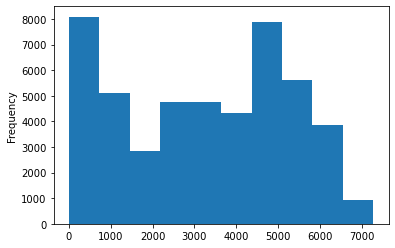

In [3]:
# Import matplotlib and look at histogram of `traffic_volume`
import matplotlib.pyplot as plt
%matplotlib inline

traffic["traffic_volume"].plot.hist()
plt.show()

In [4]:
# Look at summary statistics of `traffic_volume`
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see that there are many cars passing by the station when traffic volume is low (less than 1,000) and also when traffic volume is high (over 4,500).  Perhaps the time of day influences this (traffic volume), so we look into that possibility below.  To do so, we first split the dataset into two parts, daytime data (between 7am and 7pm) and nighttime data (between 7pm and 7am).

In [5]:
# Convert `date_time` column from string type to datetime type
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [6]:
traffic["date_time"].dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7])

In [7]:
# Isolate daytime data (between 7am and 7pm)
traffic_day = traffic[traffic["date_time"].dt.hour.between(7, 18)]

# Isolate nighttime data (between 7pm and 7am)
traffic_night = traffic[traffic["date_time"].dt.hour.between(0, 6) | traffic["date_time"].dt.hour.between(19, 23)]

# Check that the above logic worked
traffic_night_hours = traffic_night["date_time"].dt.hour.unique()
traffic_night_hours.sort()
print(traffic_night_hours)

traffic_day_hours = traffic_day["date_time"].dt.hour.unique()
traffic_day_hours.sort()
print(traffic_day_hours)

[ 0  1  2  3  4  5  6 19 20 21 22 23]
[ 7  8  9 10 11 12 13 14 15 16 17 18]


## Day vs. Night Traffic Volume - Grid Chart

Now we break up the previous histogram of traffic volume into a daytime and a nighttime histogram side-by-side on a grid chart.

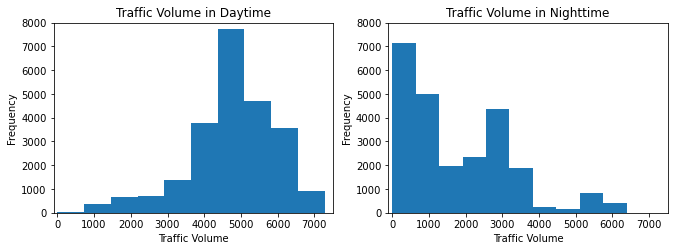

In [8]:
# Align both grid charts with same axes values, labels, and similar titles
# Also tighten up the histogram sizes
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
traffic_day["traffic_volume"].plot.hist()
plt.title("Traffic Volume in Daytime")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel("Traffic Volume")

plt.subplot(1, 2, 2)
traffic_night["traffic_volume"].plot.hist()
plt.title("Traffic Volume in Nighttime")
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel("Traffic Volume")

plt.show()

In [9]:
# Look at summary statistics for daytime traffic volume
traffic_day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
# Look at summary statistics for nighttime traffic volume
traffic_night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can see that traffic volume at night is skewed right (from both the histogram and the summary statistics), implying that there is not much traffic at night in general.  More concretely, most of the hours at night have low traffic volume and only a handful of hours have high traffic volume.  This nighttime data is unlikely to be useful in determining indicators of heavy traffic, so we will disregard it and focus on the daytime data only going forward.

In [11]:
# Create new `month` column and calculate average `traffic_volume` (by month)
traffic_day['month'] = traffic_day.loc[:,'date_time'].dt.month
by_month = traffic_day.groupby('month').mean()

/var/folders/6s/4st0n3fj0695q_pvhws11jw40000gn/T/ipykernel_37234/3382838490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['month'] = traffic_day.loc[:,'date_time'].dt.month


## Day Traffic Volume by Month - Line Plot

We now see how the average daytime traffic volume varies by **month**.  Recall that we have nearly six years of data, so any year-specific changes in traffic such as construction will be smoothed out a bit.

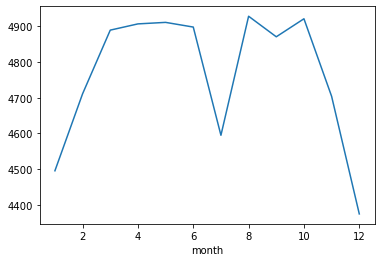

In [12]:
# Plot line graph of average `traffic_volume` by `month`
by_month["traffic_volume"].plot.line()
plt.show()

It looks like winter months have lower traffic volume, especially December and January, compared to other seasons.  There is also a very noticeable drop in traffic volume in the single month of July.  

## Day Traffic Volume by Day - Line Plot

Next, we see how the average daytime traffic volume varies by **day**.

In [13]:
# Create new `day_of_week` column and calculate average `traffic_volume` (by day of the week)
traffic_day["day_of_week"] = traffic_day.loc[:,'date_time'].dt.dayofweek
by_day_of_week = traffic_day.groupby("day_of_week").mean()

/var/folders/6s/4st0n3fj0695q_pvhws11jw40000gn/T/ipykernel_37234/2680303799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day["day_of_week"] = traffic_day.loc[:,'date_time'].dt.dayofweek


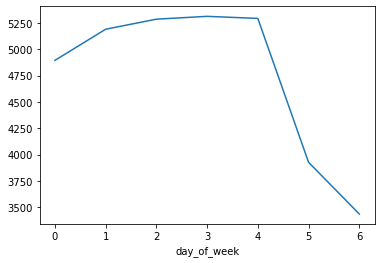

In [14]:
# Plot line graph of average `traffic_volume` by `day_of_week`
by_day_of_week["traffic_volume"].plot.line()
plt.show()

It can be easily seen from the line plot above that traffic volume is much higher during business days (0-4) compared to the weekend (5-6).

## Day Traffic Volume by Hour - Line Plots

Next, we see how the average daytime traffic volume varies by hour.  We first split out the weekend data from the business days data, so that the averages can be looked at separately.

In [15]:
traffic_day["hour"] = traffic_day["date_time"].dt.hour
bussiness_days = traffic_day.copy()[traffic_day["day_of_week"] <= 4] # 4 == Friday
weekend = traffic_day.copy()[traffic_day["day_of_week"] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

# print(by_hour_business["traffic_volume"])
# print(by_hour_weekend["traffic_volume"])

/var/folders/6s/4st0n3fj0695q_pvhws11jw40000gn/T/ipykernel_37234/1068335179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day["hour"] = traffic_day["date_time"].dt.hour


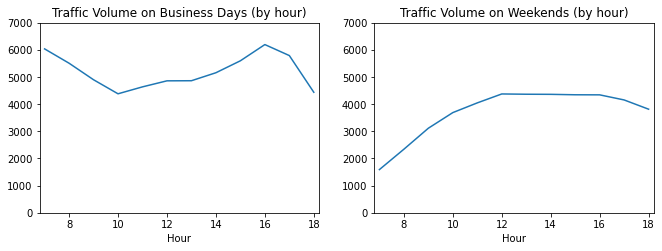

In [16]:
# Align both grid charts with same axes values, labels, and similar titles
# Also tighten up the histogram sizes
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business["traffic_volume"].plot.line()
plt.title("Traffic Volume on Business Days (by hour)")
plt.xlim(6.8, 18.2)
plt.ylim(0, 7000)
plt.xlabel("Hour")

plt.subplot(1, 2, 2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic Volume on Weekends (by hour)")
plt.xlim(6.8, 18.2)
plt.ylim(0, 7000)
plt.xlabel("Hour")

plt.show()

One can easily see from the line graphs above that rush hours on business days are 7am and 5pm, when folks go to and leave work.  Weekends are much quieter overall, especially before noon.

## Weather Indicators of Heavy Traffic

We now turn our attention from the influence of time on traffic to the influence of weather and see if there are any connections.  We first look at correlation statistics of each numerical weather variable to traffic volume.

In [17]:
# Look at correlations between `traffic_volume` and numerical weather data/columns
traffic_day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see from the statistics above that the highest positive correlation to `traffic_volume` is `temp`, though pretty weak at only 0.13.  

Shown below is a scatterplot of these two variables.  As expected from the correlation coefficient, we can visually observe that `temp` does not appear to be a strong indication of heavy (or light) traffic.

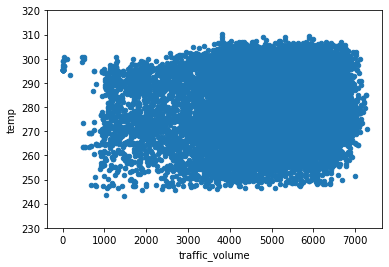

In [18]:
# Scatterplot of traffic vs. temperature
traffic_day.plot.scatter("traffic_volume", "temp")
plt.ylim(230, 320)
plt.show()

## Day Traffic Volume by Categorial Weather Variables - Horizontal Bar Plot

Lastly, we look for indicators of heavy traffic using the descriptive/categorical weather columns in the data.

<AxesSubplot:ylabel='weather_main'>

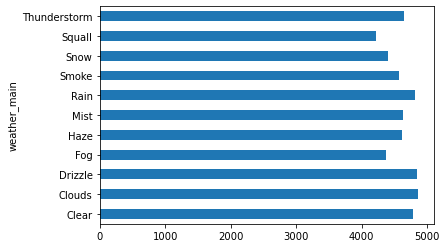

In [19]:
# Plot average `traffic_volume` by `weather_main` column in horizontal bar graph
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

by_weather_main["traffic_volume"].plot.barh()

Surprisingly, there are no `weather_main` categories that have `traffic_volume` exceeding 5,000.  In addition, there is not as much variation of `traffic_volume` by `weather_main` as I expected.  The categories that have the highest average traffic are thunderstorm, drizzle, clouds, and rain, which makes sense since those conditions are more difficult to drive in.  It is also somewhat surprising to see that foggy conditions actually has the lowest average traffic.  It seems like that weather condition would also be quite difficult to drive in.

<AxesSubplot:ylabel='weather_description'>

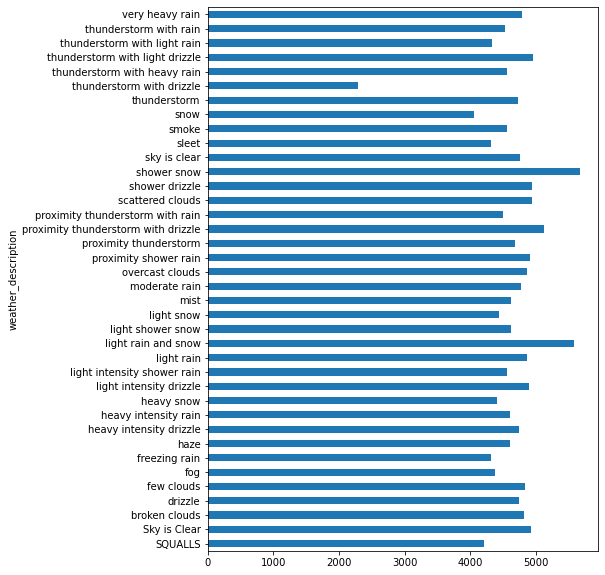

In [20]:
by_weather_description["traffic_volume"].plot.barh(figsize=(7,10))

The two weather descriptions whose traffic volumes exceed 5,000 are 'light rain and snow' and 'shower snow'.  However, not that there are several other weather descriptions that include snow, such as 'snow', 'light snow', and 'light shower snow' and these average traffic volumes are below 5,000.  Because categories could overlap like this, they are somewhat excessively granular.  As a result, it is difficult to definitively form accurate conclusions with them and do not give too much insights on heavy traffic indicators.

## Conclusion

Throughout this project, we found the following indicators of heavy traffic on the I-94 interstate highway:

* Day hours (7am - 7pm) have much more traffic than night hours (7pm - 7am)
* Winter traffic is noticeably lower than traffic in other seasons
* Business days (Mon-Fri) have much more traffic than weekends (Sat-Sun)
* Rush hours on business days is 7am and 5pm
* Rainy and snowy weather conditions indicate more traffic than other weather conditions